In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = [0.9, 0.92, 0.94, 0.95, 0.96, 0.98, 1., 1.02, 1.04, 1.05, 1.06, 1.08, 1.1]
y = []

In [4]:
data090 = pd.read_table("./out/out090.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data092 = pd.read_table("./out/out092.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data094 = pd.read_table("./out/out094.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data095 = pd.read_table("./out/out095.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data096 = pd.read_table("./out/out096.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data098 = pd.read_table("./out/out098.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data100 = pd.read_table("./out/out100.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data102 = pd.read_table("./out/out102.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data104 = pd.read_table("./out/out104.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data105 = pd.read_table("./out/out105.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data106 = pd.read_table("./out/out106.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data108 = pd.read_table("./out/out108.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])
data110 = pd.read_table("./out/out110.out", delimiter = '\t', names = ['tau', 'N', 'x', 'eta'])

In [5]:
y.append(data090['eta'].max())
y.append(data092['eta'].max())
y.append(data094['eta'].max())
y.append(data095['eta'].max())
y.append(data096['eta'].max())
y.append(data098['eta'].max())
y.append(data100['eta'].max())
y.append(data102['eta'].max())
y.append(data104['eta'].max())
y.append(data105['eta'].max())
y.append(data106['eta'].max())
y.append(data108['eta'].max())
y.append(data110['eta'].max())

In [6]:
y

[5.13036,
 5.2455,
 5.49167,
 5.733569999999999,
 6.16255,
 8.98522,
 19.7318,
 8.96186,
 6.26208,
 5.8304,
 5.5808800000000005,
 5.31917,
 5.192]

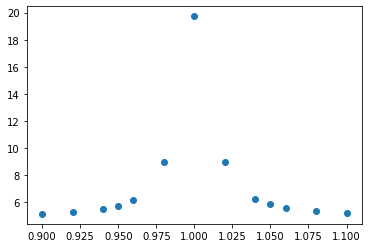

In [7]:
plt.scatter(x, y)

In [31]:
from scipy.optimize import curve_fit

In [51]:
def lorentzian(x, gamma, x0):
    return 1/3.14159 * (0.5 * gamma / ((x - x0)**2 + (0.5 * gamma) ** 2))

In [33]:
def lorentzian(x, gamma, x0, c1, c2):
    return c1 + 2*c2/3.14159 * ( gamma / (4 * (x - x0)**2 + (gamma)))

In [52]:

def fit_lorentzian(x_data, y_data):
    #estimate parameters
    gamma = 0.1
    x0 = 1
    c1 = 19
    c2 = 10
    
    #fit function
    parameters, covariance = curve_fit(lorentzian, x_data, y_data, p0 = [gamma, x0])
    fit_y = lorentzian(x_data, parameters[0], parameters[1])
    return fit_y, parameters, covariance

In [53]:
fit_y, param, cov= fit_lorentzian(x, y)

In [54]:
x_from_fit = np.linspace(0.9, 1.1, 100)
y_from_fit = lorentzian(x_from_fit, param[0], param[1])

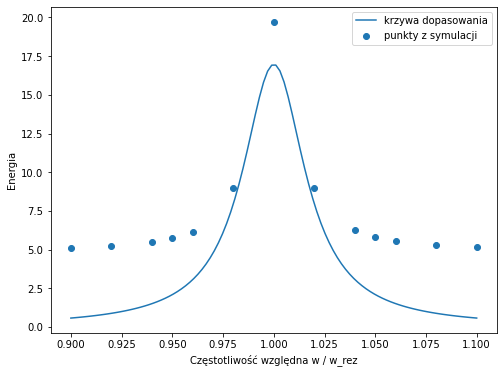

In [55]:
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(x_from_fit, y_from_fit, label = "krzywa dopasowania")
plt.scatter(x, y, label="punkty z symulacji")
plt.legend()
plt.xlabel("Częstotliwość względna w / w_rez")
plt.ylabel("Energia")
plt.savefig("dopasowanie_dobre.png")

In [56]:
param

array([0.03752132, 1.00003111])